# Librerias

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Cargamos los datos con el primer potenciometro

In [12]:
ruta = 'Mediciones potencia'
files = os.listdir(ruta)

W_files, I_files = [], []
for file in files[3:]: #--> El primer archivo corresponde a la segunda medicion
    # Guardado de la corriente
    amp = float(file[4:-5])
    I_files.append(amp) #A

    # Cargamos los archivos
    df = pd.read_csv(ruta + f'/{file}', sep=" ", header=None)
    wats = df[2][2:] #--> todos los valores

    # Guardamos los valores
    wats_str = np.array([ float(wat[1] + '.' + wat[3:-5]) for wat in wats]) #--> No tengo en cuenta la potencia
    pot_wat = np.array([ float(wat[-3]) for wat in wats])

    W_files.append(wats_str * 10**(-pot_wat)) #W


## Sacamos valores medios y std

In [13]:
I, err_I, W, err_W = [], [], [], []
for i, w in zip(I_files, W_files):
    I.append(np.mean(i)), err_I.append(np.std(i))
    W.append(np.mean(w)), err_W.append(np.std(w))

# Graficamos

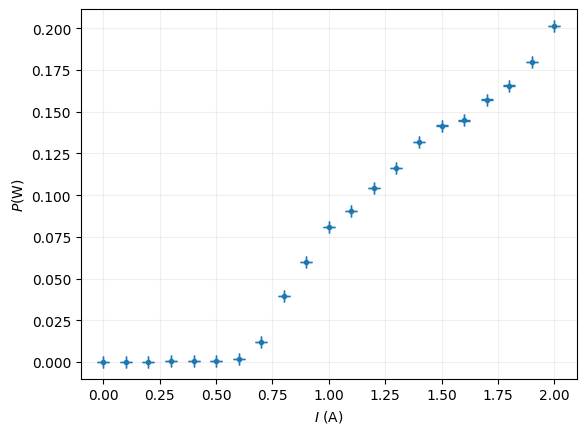

In [14]:
plt.figure()
plt.errorbar(I, W, yerr = err_W, xerr = err_I, fmt = '.', capsize = 4)

plt.xlabel(r'$I$ (A)'), plt.ylabel(r'$P$(W)')

plt.grid(alpha = 0.2)
plt.show()

In [32]:
pot = [0, 0, 0.1e-3, 0.1e-3, 0.2e-3, 0.5e-3, 0.9e-3, 6e-3, 18e-3, 27.0e-3, 31.3e-3, 37.0e-3, 42.9e-3, 44.8e-3, 53.7e-3, 64.3e-3, 74.6e-3, 83.7e-3, 94.6e-3, 105.6e-3, 117.2e-3, 128.6e-3, 141.6e-3, 153.7e-3] #W
a = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3] #A
len(a), len(pot)
pd.DataFrame({'I (A)': a, 'P (W)': pot}).to_csv('Mediciones potencia/Datos_potencia_1064_luz_apagada_sin-lasear.csv', index=False)

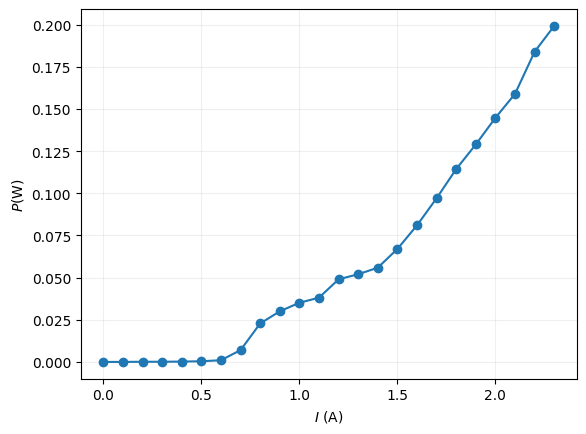

In [ ]:
plt.figure(0, )
#plt.errorbar(a, pot, yerr = err_W, xerr = err_I, fmt = '.', capsize = 4)
plt.plot(a, pot, 'o-')
plt.xlabel(r'$I$ (A)'), plt.ylabel(r'$P$(W)')

plt.grid(alpha = 0.2)
plt.show()

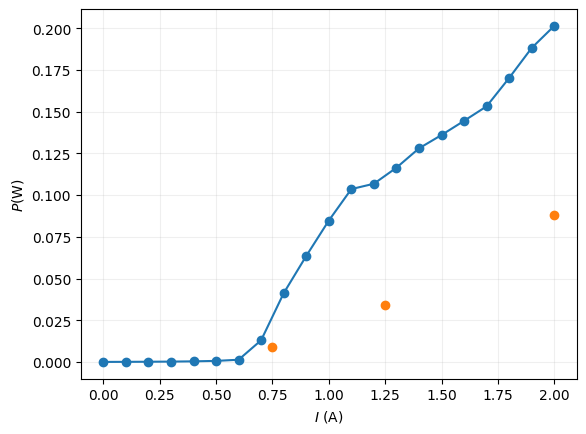

In [30]:
df = pd.read_csv('Mediciones potencia/medicion_completa_slim.csv')
I2, P2 = df['Corriente[A]'], df['Potencia[W]']

df2 = pd.read_csv('Mediciones potencia/Datos_potencia_810.csv')
Ib, Pb = df2['I (A)'], df2['P (W)']

plt.plot(I2, P2, 'o-')
plt.plot(Ib, Pb, 'o')
plt.xlabel(r'$I$ (A)'), plt.ylabel(r'$P$(W)')
plt.grid(alpha = 0.2)
plt.show()